<a href="https://colab.research.google.com/github/TietNguyenHoangTanDat/AI-SangT5/blob/main/ROBOT_WEEK5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-12-033c916e6cf5>:55: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-12-033c916e6cf5>:56: UserWarning: The following kwargs were not used by contour: 'offsert', 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'x', offsert = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-12-033c916e6cf5>:57: UserWarning: The following kwargs were not used by contour: 'offsert', 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'y', offsert = 11, cmap = 'viridis', anpha = 0.5)


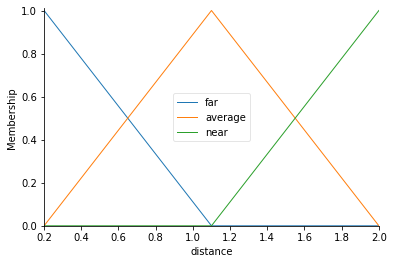

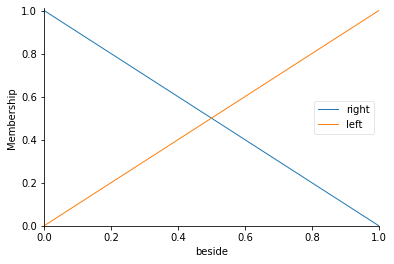

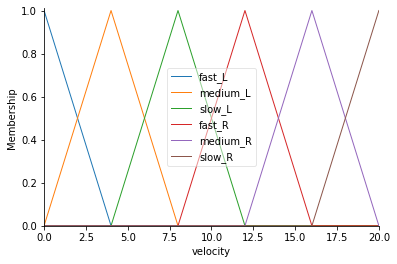

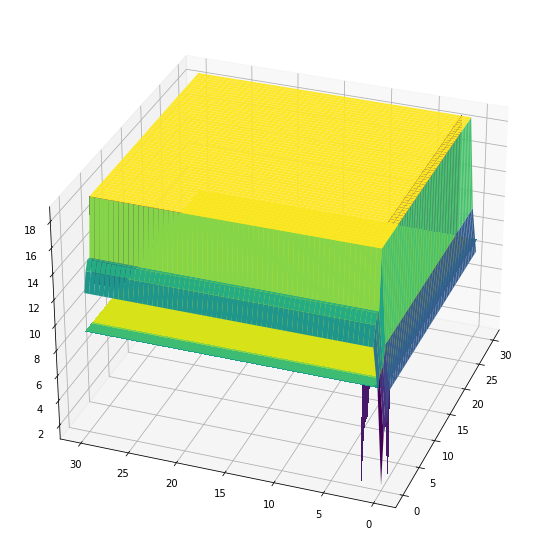

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.control.visualization import plt
from networkx.algorithms.bipartite import projection
from networkx import attr_sparse_matrix

#input
universe = np.linspace(0.2,2,61)
universe2 = np.linspace(0,1,2)
#output
universe1 = np.linspace(0,20,61) 


name = ['right', 'left']
name1 = ['fast_L', 'medium_L', 'slow_L', 'fast_R', 'medium_R', 'slow_R']
name2 = ['far', 'average', 'near']

distance = ctrl.Antecedent(universe,'distance')
beside = ctrl.Antecedent(universe2, 'beside')
velocity = ctrl.Consequent(universe1, 'velocity')

distance.automf(names = name2)
beside.automf(names = name)
velocity.automf(names = name1)

distance.view()
beside.view()
velocity.view()

rule0 = ctrl.Rule(antecedent = distance['near']&beside['right'],consequent = velocity['slow_L'], label = 'motor slow the left')
rule1 = ctrl.Rule(antecedent = distance['near']&beside['left'],consequent = velocity['slow_R'], label = 'motor slow the right')
rule2 = ctrl.Rule(antecedent = distance['average']&beside['right'],consequent = (velocity['slow_L']), label = 'motor average_S the left')
rule3 = ctrl.Rule(antecedent = distance['average']&beside['left'],consequent = (velocity['slow_R']), label = 'motor average_S the right')
rule4 = ctrl.Rule(antecedent = distance['far']&beside['right'],consequent = velocity['fast_L'], label = 'motor fast the left')
rule5 = ctrl.Rule(antecedent = distance['far']&beside['left'],consequent = velocity['fast_R'], label = 'motor fast the right')
rule6 = ctrl.Rule(antecedent = distance['average']&beside['right'],consequent = (velocity['fast_L']), label = 'motor average_F the left')
rule7 = ctrl.Rule(antecedent = distance['average']&beside['left'],consequent = (velocity['fast_R']), label = 'motor average_F the right')
system = ctrl.ControlSystem(rules = [rule0, rule1, rule2, rule3, rule4, rule5, rule6, rule7])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(0,30,61)
x,y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['distance'] = x[i,j]
    sim.input['beside'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['velocity']

# Ve surface, do thi cua ham va cac bien dau vao, be mat dieu khien
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offsert = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'y', offsert = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,200)